In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy.io import wavfile
from mfcc import *

In [2]:
sr, x = wavfile.read("doves.wav")
w = 2048
h = 512
S = stft(x, w, h)
S = np.abs(S[0:w//2+1, :]) # Pull out non-redundant frequency bins

In [ ]:
ipd.Audio(x, rate=sr)

# Part 1: Inverting Mel-Spaced Spectrograms

1. Create a magnitude mel-spaced spectrogram MS by multiplying on the left by a matrix M
2. Multiply MS on the left by the transpose of M; that is, M where the rows are switched for the columns. You can obtain this with M.T in numpy. This will yield a matrix with the original shape of the STFT, which is the closest approximation we can get to the STFT after we've applied the mel filterbank. We'll check in as a class after this step
3. Apply random phases to this new spectrogram
4. Mirror this new spectrogram and perform the inverse STFT, then listen to the result.

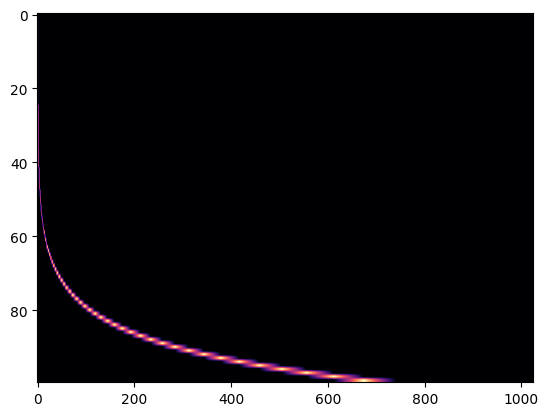

In [20]:
K = S.shape[0]
min_freq = 1
max_freq = 16000
n_bins = 100
M = get_mel_filterbank(K, w, sr, min_freq, max_freq, n_bins)

plt.imshow(M, aspect = 'auto', cmap = 'magma')

(0.0, 100.0)

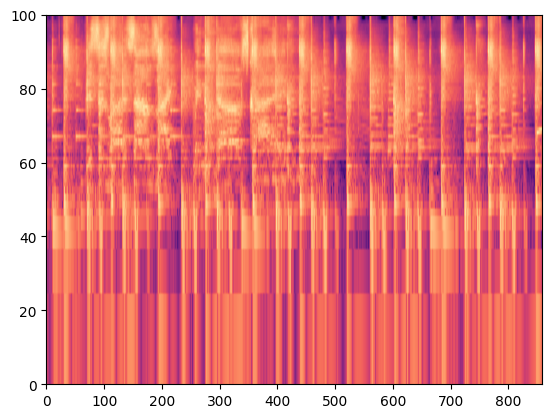

In [21]:
MS = np.dot(M,S) # M.dot(S) is the same as np.dot(M,S)
plt.imshow(amplitude_to_db(MS), aspect = 'auto', cmap = 'magma')
plt.ylim([0, MS.shape[0]])

(0.0, 200.0)

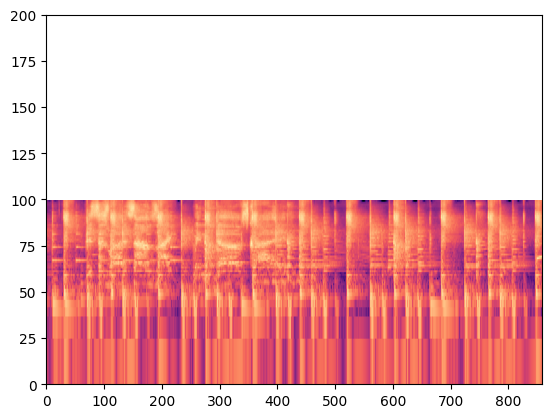

In [26]:
SInv = np.dot(M.T, MS)
plt.imshow(amplitude_to_db(MS), aspect = 'auto', cmap = 'magma')
plt.ylim([0, 200])

# Part 2: Mel-Frequency Cepstral Coefficients